iter 0:train_error=72.95350906534314, valid_error=79.94994644647404
iter 1:train_error=65.88540819278482, valid_error=77.89825867474387
iter 2:train_error=61.21270404100579, valid_error=76.49257183420882
iter 3:train_error=57.57355447142617, valid_error=75.01129100437457
iter 4:train_error=54.52451614521066, valid_error=73.38230111009317
iter 5:train_error=51.85502838283833, valid_error=71.6388640238082
iter 6:train_error=49.46047405484943, valid_error=69.8378333059637
iter 7:train_error=47.28491201680789, valid_error=68.03067682990934
iter 8:train_error=45.29513872075468, valid_error=66.25594539949901
iter 9:train_error=43.46890607832079, valid_error=64.53954885928026
iter 10:train_error=41.78953906586313, valid_error=62.89730583479185
iter 11:train_error=40.24344933148538, valid_error=61.33769165782493
iter 12:train_error=38.81896183928525, valid_error=59.864127810717946
iter 13:train_error=37.5057391368817, valid_error=58.47670204553148
iter 14:train_error=36.29447970031777, valid_e

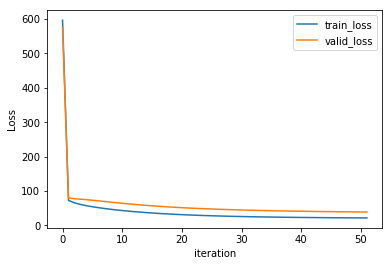

Linear regression finished \(^^)


In [2]:
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

filename = "housing_scale"
learning_rate = 0.1  #学习率
num_iter = 50  #最大迭代次数

#训练及优化
def optimizer(data1,label1,data2,label2,starting_b,starting_w):

    b = starting_b
    w = starting_w
    Loss_train = []
    Loss_valid = []
    loss_start = compute_error(b, w, data1, label1)
    loss_start2 = compute_error(b, w, data2, label2)
    Loss_train.append(loss_start)
    Loss_valid.append(loss_start2)
    for i in range(num_iter):
        b, w = compute_gradient(b, w, data1, label1)
        if i<50:
            loss = compute_error(b, w, data1, label1)
            loss_valid=compute_error(b,w,data2,label2)
            print('iter {0}:train_error={1}, valid_error={2}'.format \
                      (i, float(loss), float(loss_valid)))
            Loss_train.append(float(loss))
            Loss_valid.append(float(loss_valid))

    loss_final = compute_error(b, w, data1, label1)
    loss_final2 = compute_error(b, w, data2, label2)
    Loss_train.append(loss_final)
    Loss_valid.append(loss_final2)
    return [b,w,Loss_train,Loss_valid]

#梯度更新
def compute_gradient(b_current,w_current,data,label):

    b_gradient = 0
    w_gradient=(np.zeros((1, 13)))
    N = data.shape[0]

    for i in range(N):
        v = data[i, :].T
        w_gradient += (v * (label[i]-w_current * v - b_current)).T
        b_gradient += label[i] - w_current * v - b_current
    b_gradient = -(2/float(N))*b_gradient
    w_gradient = -(2/float(N))*w_gradient

    new_b = b_current - (learning_rate * b_gradient)
    new_w = w_current - (learning_rate * w_gradient)
    return [new_b,new_w]

#计算Loss函数值
def compute_error(b, w, data, label):

    totalError = 0
    count = data.shape[0]
    for i in range(0, count):
        v = data[i, :].T
        c=(label[i] - w * v - b) ** 2
        totalError += (label[i] - w * v - b) ** 2

    return totalError/float(count)

#读入,划分训练和测试数据
def get_data(filename):

    #读入数据
    data = load_svmlight_file(filename)
    X, y = data[0], data[1]
    #划分训练数据和测试数据
    train_X, valid_X, train_y, valid_y = train_test_split(X, y, train_size=0.8, random_state=0)

    return (train_X, valid_X, train_y, valid_y)

#绘图
def plot_loss(y1,y2):

    plt.plot(y1, label='train_loss')
    plt.plot(y2, label='valid_loss')
    plt.legend()
    plt.xlabel('iteration');
    plt.ylabel('Loss');
    plt.show()

#线性回归模型初始化
def linear_regression():

    # 参数初始化
    w=mat(np.zeros((1, 13)))
    b = 0.0
    loss_train = []
    loss_valid = []

    train_X, valid_X, train_y, valid_y = get_data(filename)
    [b, w, loss_train, loss_valid] = optimizer(train_X, train_y,valid_X,valid_y, b, w)
    # print(w)
    # print(b)
    plot_loss(loss_train, loss_valid)

if __name__ =='__main__':

    linear_regression()
    print("Linear regression finished \(^^)")
